In [1]:
import pandas as pd
import seaborn as sn
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv ("C:\\Users\\INDIA\\Downloads\\Assignment csv file\\50_Startups.csv")
data.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

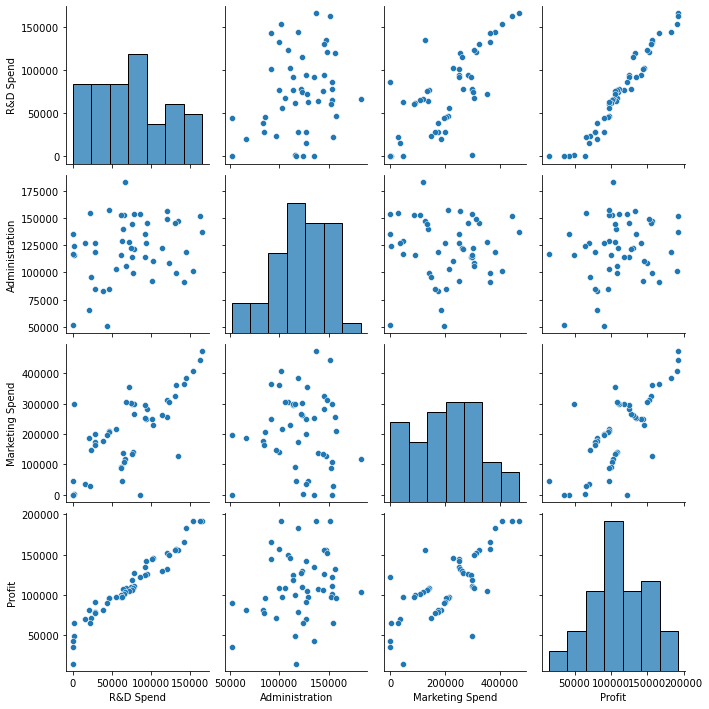

In [3]:
sn.pairplot(data)

In [4]:
data.corr()

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

In [5]:
data2 = data.rename({ 'R&D Spend' : 'RD', 'Marketing Spend' : 'MARKET', 'Administration' : 'ADMIN'}, axis=1)

In [6]:
data2.head()

RD      ADMIN     MARKET       State     Profit
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94

In [7]:
data2.head()

RD      ADMIN     MARKET       State     Profit
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94

In [8]:
model = smf.ols ('Profit~RD+ADMIN+MARKET', data=data2).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           4.53e-30
Time:                        14:23:55   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
ADMIN         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MARKET         0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# as we can see the p value for ADMIN and MARKET are not significant
# we will check with simple-linear-regression and multi-linear-regression

In [16]:
print(model.pvalues)

Intercept    1.057379e-09
RD           2.634968e-22
ADMIN        6.017551e-01
MARKET       1.047168e-01
dtype: float64


In [ ]:
# we can see that MARKET has significant p value but p value for ADMIN is insignificant

In [17]:
# multi linear regression 

mlr_AD = smf.ols('Profit~ADMIN+MARKET', data=data2).fit()

In [18]:
mlr_AD.pvalues

Intercept    2.589341e-01
ADMIN        1.729198e-02
MARKET       9.727245e-11
dtype: float64

In [ ]:
# the pvalue for multilinear regresssion is significant

# check colinearity :-

In [19]:
rsq_admin = smf.ols('ADMIN~MARKET+RD', data=data2).fit().rsquared
vif_admin = 1/(1-rsq_admin)

rsq_market = smf.ols('MARKET~RD+ADMIN', data=data2).fit().rsquared
vif_market = 1/(1-rsq_market)

rsq_rd = smf.ols('RD~MARKET+ADMIN', data=data2).fit().rsquared
vif_rd = 1/(2-rsq_rd)

In [20]:
df = {'INPUTS' : ['ADMIN', 'MARKET', 'RD'], 'VIF' : [vif_admin , vif_market , vif_rd]}

In [21]:
vif_frame = pd.DataFrame (df)
vif_frame

INPUTS       VIF
0   ADMIN  1.175091
1  MARKET  2.326773
2      RD  0.711724

In [22]:
# all the vif value for inputs are less than 20 we can say that there is no coliniearity

# Partial Regression plot :-

In [23]:
import statsmodels.api as sm

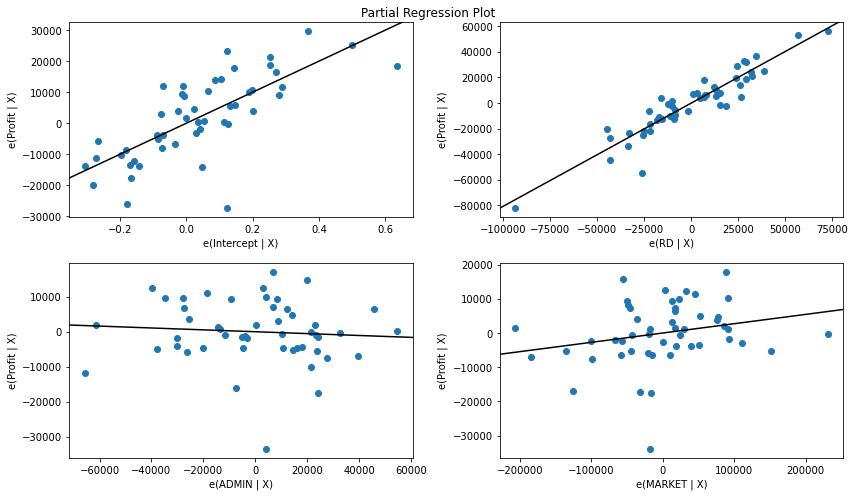

In [24]:
fig = plt.figure(figsize=(12,7))
fig = sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()

In [25]:
# from above figures we can say that all the inputs are contributing towards the output


# cooks distance :- to find the outliers

In [26]:
from statsmodels.graphics.regressionplots import influence_plot

In [27]:
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance

<StemContainer object of 3 artists>

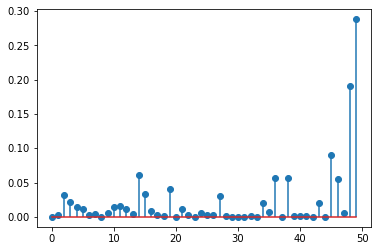

In [28]:
plt.stem(np.arange(len(data2)) , np.round(c,3))

In [29]:
# from above figure we can see that 49th , 48th, 45th row have high influence values so we will remove them


In [30]:
data3 = data2.drop(data2.index[[49,48,45]],axis=0).reset_index()
data3 = data3.drop(['index'],axis=1)
data3

RD      ADMIN     MARKET       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84  261776.23    New York  129917.04
16   78013.11  121597.55  264346.06  California  126992.93
17   94657.16  145077.58  282574.31    New York  125370.37
18   91749.16  114175.79  294919.57     Florida  124266.90
19   86419.70  153514.11       0.00    New York  122776.86
20   76253.86  113867.30  298664.47  California  118474.03
21   78389.47  153773.43  299737.29    New York  111313.02
22   73994.56  122782.75  303319.26     Florida  110352.25
23   67532.53  105751.03  304768.73     Florida  108733.99
24   77044.01   99281.34  140574.81    New York  108552.04
25   64664.71  139553.16  137962.62  California  107404.34
26   75328.87  144135.98  134050.07     Florida  105733.54
27   72107.60  127864.55  353183.81    New York  105008.31
28   66051.52  182645.56  118148.20     Florida  103282.38
29   65605.48  153032.06  107138.38    New York  101004.64
30   61994.48  115641.28   91131.24     Florida   99937.59
31   61136.38  152701.92   88218.23    New York   97483.56
32   63408.86  129219.61   46085.25  California   97427.84
33   55493.95  103057.49  214634.81     Florida   96778.92
34   46426.07  157693.92  210797.67  California   96712.80
35   46014.02   85047.44  205517.64    New York   96479.51
36   28663.76  127056.21  201126.82     Florida   90708.19
37   44069.95   51283.14  197029.42  California   89949.14
38   20229.59   65947.93  185265.10    New York   81229.06
39   38558.51   82982.09  174999.30  California   81005.76
40   28754.33  118546.05  172795.67  California   78239.91
41   27892.92   84710.77  164470.71     Florida   77798.83
42   23640.93   96189.63  148001.11  California   71498.49
43   15505.73  127382.30   35534.17    New York   69758.98
44   22177.74  154806.14   28334.72  California   65200.33
45    1315.46  115816.21  297114.46     Florida   49490.75
46       0.00  135426.92       0.00  California   42559.73

In [31]:
model2 = smf.ols('Profit~RD+ADMIN+MARKET', data=data3).fit()

In [32]:
# Now check the outliers again

In [33]:
model2_influence = model2.get_influence()
(c1,_)=model2_influence.cooks_distance

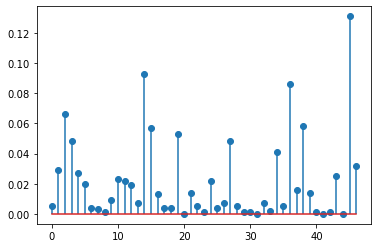

In [34]:
plt.stem(np.arange(len(data3)),np.round(c1,3))
plt.show()

In [35]:
# we will remove 46th and 14th ,36th row

In [36]:
data4=data3.drop(data3.index[[46,14,36]],axis=0).reset_index()
data4=data4.drop(['index'],axis=1)
data4

RD      ADMIN     MARKET       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  114523.61  122616.84  261776.23    New York  129917.04
15   78013.11  121597.55  264346.06  California  126992.93
16   94657.16  145077.58  282574.31    New York  125370.37
17   91749.16  114175.79  294919.57     Florida  124266.90
18   86419.70  153514.11       0.00    New York  122776.86
19   76253.86  113867.30  298664.47  California  118474.03
20   78389.47  153773.43  299737.29    New York  111313.02
21   73994.56  122782.75  303319.26     Florida  110352.25
22   67532.53  105751.03  304768.73     Florida  108733.99
23   77044.01   99281.34  140574.81    New York  108552.04
24   64664.71  139553.16  137962.62  California  107404.34
25   75328.87  144135.98  134050.07     Florida  105733.54
26   72107.60  127864.55  353183.81    New York  105008.31
27   66051.52  182645.56  118148.20     Florida  103282.38
28   65605.48  153032.06  107138.38    New York  101004.64
29   61994.48  115641.28   91131.24     Florida   99937.59
30   61136.38  152701.92   88218.23    New York   97483.56
31   63408.86  129219.61   46085.25  California   97427.84
32   55493.95  103057.49  214634.81     Florida   96778.92
33   46426.07  157693.92  210797.67  California   96712.80
34   46014.02   85047.44  205517.64    New York   96479.51
35   44069.95   51283.14  197029.42  California   89949.14
36   20229.59   65947.93  185265.10    New York   81229.06
37   38558.51   82982.09  174999.30  California   81005.76
38   28754.33  118546.05  172795.67  California   78239.91
39   27892.92   84710.77  164470.71     Florida   77798.83
40   23640.93   96189.63  148001.11  California   71498.49
41   15505.73  127382.30   35534.17    New York   69758.98
42   22177.74  154806.14   28334.72  California   65200.33
43    1315.46  115816.21  297114.46     Florida   49490.75

In [37]:
model3=smf.ols('Profit~RD+ADMIN+MARKET', data=data4).fit()

In [38]:
# now check again if there is any highly influential value or not


In [39]:
model3_influence = model3.get_influence()
(c2,_)=model3_influence.cooks_distance

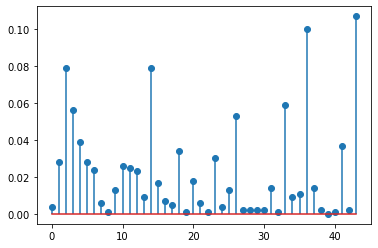

In [40]:
plt.stem(np.arange(len(data4)), np.round(c2,3))
plt.show()

In [41]:
data5=data4.drop(data3.index[[43,36]],axis=0).reset_index()
data5=data5.drop(['index'],axis=1)
data5

RD      ADMIN     MARKET       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  114523.61  122616.84  261776.23    New York  129917.04
15   78013.11  121597.55  264346.06  California  126992.93
16   94657.16  145077.58  282574.31    New York  125370.37
17   91749.16  114175.79  294919.57     Florida  124266.90
18   86419.70  153514.11       0.00    New York  122776.86
19   76253.86  113867.30  298664.47  California  118474.03
20   78389.47  153773.43  299737.29    New York  111313.02
21   73994.56  122782.75  303319.26     Florida  110352.25
22   67532.53  105751.03  304768.73     Florida  108733.99
23   77044.01   99281.34  140574.81    New York  108552.04
24   64664.71  139553.16  137962.62  California  107404.34
25   75328.87  144135.98  134050.07     Florida  105733.54
26   72107.60  127864.55  353183.81    New York  105008.31
27   66051.52  182645.56  118148.20     Florida  103282.38
28   65605.48  153032.06  107138.38    New York  101004.64
29   61994.48  115641.28   91131.24     Florida   99937.59
30   61136.38  152701.92   88218.23    New York   97483.56
31   63408.86  129219.61   46085.25  California   97427.84
32   55493.95  103057.49  214634.81     Florida   96778.92
33   46426.07  157693.92  210797.67  California   96712.80
34   46014.02   85047.44  205517.64    New York   96479.51
35   44069.95   51283.14  197029.42  California   89949.14
36   38558.51   82982.09  174999.30  California   81005.76
37   28754.33  118546.05  172795.67  California   78239.91
38   27892.92   84710.77  164470.71     Florida   77798.83
39   23640.93   96189.63  148001.11  California   71498.49
40   15505.73  127382.30   35534.17    New York   69758.98
41   22177.74  154806.14   28334.72  California   65200.33

In [42]:
model4=smf.ols('Profit~RD+ADMIN+MARKET',data=data5).fit()

In [43]:
# now check again if there is any highly influential value or not

In [44]:
model4_influence = model4.get_influence()
(c3,_)=model4_influence.cooks_distance

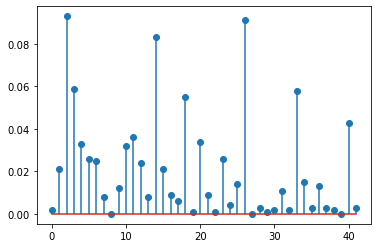

In [45]:
plt.stem(np.arange(len(data5)),np.round(c3,3))
plt.show()

In [46]:
# there are no any high influence value in our data

# error assumption

In [47]:
model4 = smf.ols('Profit~RD+ADMIN+MARKET',data=data5).fit()
pred_profit=model4.predict(data5)
pred_profit

0     191147.327133
1     187913.243681
2     181508.919457
3     173154.127995
4     171902.373588
5     163331.211077
6     159393.126954
7     159792.286448
8     151601.733975
9     155041.708130
10    136273.384614
11    136296.948228
12    129648.813672
13    127928.501795
14    146653.511381
15    117371.255122
16    130337.094080
17    129259.448099
18    117935.010860
19    116879.403494
20    117299.331339
21    114858.179309
22    110251.665601
23    114921.097351
24    103582.688206
25    111932.473629
26    114142.718016
27    102888.674341
28    103294.250298
29    101313.964025
30     99342.483422
31    101126.472155
32     98904.206232
33     89730.728052
34     91697.092770
35     91083.999488
36     85174.994209
37     76071.306546
38     76334.534599
39     72214.857149
40     62452.703265
41     66772.840217
dtype: float64

In [48]:
errors = data5.Profit - pred_profit
errors

0      1114.502867
1      3878.816319
2      9541.470543
3      9747.862005
4     -5714.433588
5     -6340.091077
6     -3270.616954
7     -4039.686448
8       610.036025
9     -5281.748130
10     9848.565386
11     7962.451772
12    11936.706328
13     6378.848205
14   -16736.471381
15     9621.674878
16    -4966.724080
17    -4992.548099
18     4841.849140
19     1594.626506
20    -5986.311339
21    -4505.929309
22    -1517.675601
23    -6369.057351
24     3821.651794
25    -6198.933629
26    -9134.408016
27      393.705659
28    -2289.610298
29    -1376.374025
30    -1858.923422
31    -3698.632155
32    -2125.286232
33     6982.071948
34     4782.417230
35    -1134.859488
36    -4169.234209
37     2168.603454
38     1464.295401
39     -716.367149
40     7306.276735
41    -1572.510217
dtype: float64

In [49]:
errors.mean()

9.683953110306036e-11

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

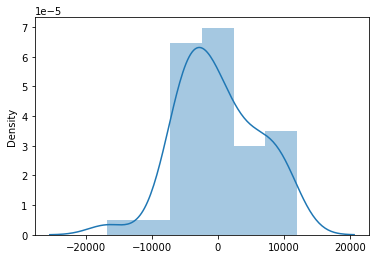

In [50]:
sn.distplot(errors)

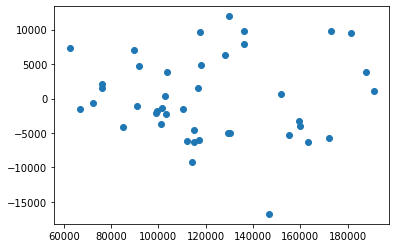

In [51]:
# check homoscadasticity :-

plt.scatter(pred_profit,errors)

In [52]:
# yes they do not follow any relation

# model validation :-

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train_data, test_data = train_test_split(data5, test_size = 0.3)

In [55]:
def RMSE (actual, pred):
    return np.sqrt(np.mean((actual-pred)*(actual-pred)))

In [56]:
# for training data:-

model_train = smf.ols('Profit~RD+ADMIN+MARKET',data=train_data).fit()

In [57]:
pred_train_profit = model_train.predict(train_data)
actual_train_profit = train_data.Profit

In [58]:
rmse_train = RMSE (actual_train_profit , pred_train_profit)
rmse_train

6330.604207424778

In [59]:
# for testing data :-

model_test = smf.ols('Profit~RD+ADMIN+MARKET',data=test_data).fit()

In [60]:
pred_test_profit = model_test.predict(test_data)
actual_test_profit = test_data.Profit

In [61]:
rmse_test = RMSE (actual_test_profit , pred_test_profit )
rmse_test

4330.871278527536

In [62]:
# as we can see the RMSE value of test data is less than training data , we can say that our model is valid model

In [63]:
dp = {'MODELS' : ['model' , 'model2', 'model3' , 'model4'],
     'R_squared' : [model.rsquared , model2.rsquared, model3.rsquared , model4.rsquared ]}

In [64]:
R_squared_table = pd.DataFrame(dp)
R_squared_table

MODELS  R_squared
0   model   0.950746
1  model2   0.964088
2  model3   0.969258
3  model4   0.967920

-------------------------------------------------------------------------------END---------------------------------------------------------------------------